# **Rodrigo_Mesquita_PB_TP4**
## **Projeto de Bloco: Inteligência Artificial e Machine Learning [24E1_5]**

**Objetivos:**

* Investigar a eficácia do uso de clusters gerados pelo algoritmo K-Médias como features adicionais em tarefas de classificação.
* Comparar o desempenho de modelos SVM treinados com e sem o uso dessas features derivadas de clusterização em conjuntos de dados variados.
* Avaliar a influência do número de clusters e da seleção de parâmetros no desempenho do modelo SVM final.
* Desenvolver diretrizes para a aplicação efetiva de técnicas de clusterização em engenharia de features para aprendizado supervisionado.

load_iris(*[, return_X_y, as_frame])
Load and return the iris dataset (classification).

load_digits(*[, n_class, return_X_y, as_frame])
Load and return the digits dataset (classification).

load_wine(*[, return_X_y, as_frame])
Load and return the wine dataset (classification).

load_breast_cancer(*[, return_X_y, as_frame])
Load and return the breast cancer wisconsin dataset (classification).

## 1.Clusterização K-Médias: Utilizaremos o algoritmo K-Médias para agrupar os dados do conjunto de treinamento. O número ótimo de clusters será determinado com base em métricas como o método do cotovelo e o índice de silhueta.

In [28]:
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns
import pandas as pd

In [2]:
def elbow_plot(erro: dict) -> None:
  maximo = max(erro.values())
  for key in erro:
    erro[key]: float(erro[key])/maximo
  plt.figure(figsize=(4, 4))
  plt.plot(list(erro.keys()), list(erro.values()), label = "Método Elbow")
  plt.ylabel('SSE', fontsize=12)
  plt.xlabel('Clusters', fontsize=12)
  plt.yticks(fontsize=12)
  plt.xticks(fontsize=12)
  plt.legend(loc='upper right')
  plt.show()

def silhouette_plot(silhouette: dict) -> None:
  plt.figure(figsize=(4, 4))
  plt.plot(list(silhouette.keys()), list(silhouette.values()), label = "Método Silhouette")
  plt.ylabel('Silhouette Score', fontsize=12)
  plt.xlabel('Clusters', fontsize=12)
  plt.yticks(fontsize=12)
  plt.xticks(fontsize=12)
  plt.legend(loc='upper right')
  plt.show()

In [26]:
iris = load_iris()
X = iris.data
Y = iris.target

X_train,X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=20)

In [30]:
print(pd.DataFrame(Y).value_counts())

0
0    50
1    50
2    50
Name: count, dtype: int64


In [31]:
silhouette = {}
elbow = {}

for k in range(2, 11, 1):
    model = KMeans(n_clusters= k, max_iter=1000)
    model.fit(X)
    elbow[k] = model.inertia_
    preds = model.predict(X)
    silhouette[k] = silhouette_score(X, preds)

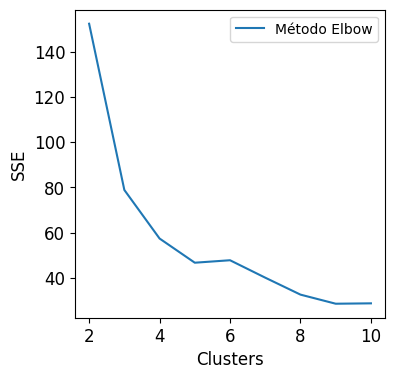

In [33]:
elbow_plot(elbow)

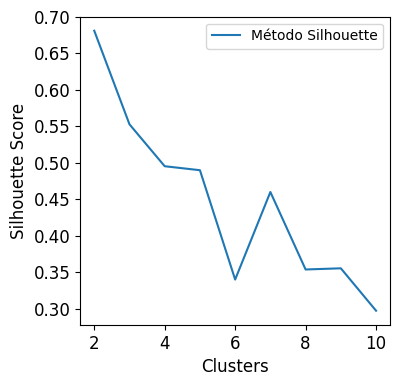

In [32]:
silhouette_plot(silhouette)

## 2.Criação de Features: Para cada instância nos conjuntos de treinamento e teste, será gerada uma nova feature indicando a distância da instância ao centro do cluster mais próximo. Este processo visa incorporar a estrutura de agrupamento dos dados como uma informação adicional para o modelo de aprendizado supervisionado.

## 3.Modelo de ML: Serão treinados utilizando tanto o conjunto de features original quanto o conjunto de features expandido com as distâncias dos clusters. Use:

### 3a.Modelos SVM com diferentes configurações de kernel (linear, polinomial, RBF) e parâmetros de regularização para otimizar o desempenho.


### 3b.Modelos Random Forest com diferentes parâmetros para otimizar o desempenho.

## 4.Avaliação de Modelos: O desempenho dos modelos será avaliado com base em métricas de classificação padrão, como precisão, recall, F1-score e AUC-ROC, utilizando os conjuntos de teste.

## 5.Análise Comparativa: Será realizada uma análise comparativa para avaliar o impacto da adição das features de clusterização no desempenho dos modelos de ML. Além disso, será discutida a influência do número de clusters e das configurações do ML nas métricas de desempenho. Use gráficos para ilustrar seus argumentos.